In [1]:
import importlib
import pandas as pd
from matplotlib import pyplot as plt
import plot_functions
import numpy as np
import scipy as sp

In [2]:
df_res = pd.read_csv('out.tsv', sep='\t', names=['CHROM', 'START', 'END', 'REF', 'ALT', 'SAMPLE', 'GENE', 'ANNOT', 'MUT_TYPE', 'CONTEXT'])

In [3]:
df_res

,CHROM,START,END,REF,ALT,SAMPLE,GENE,ANNOT,MUT_TYPE,CONTEXT
0,1,566107,566108,A,G,TCGA-WC-AA9A-01A,.,Noncoding,A>G,TAA
1,1,569341,569342,T,C,TCGA-V4-A9ES-01A,.,Noncoding,T>C,CTC
2,1,569517,569518,G,A,TCGA-VD-A8KF-01A,.,Noncoding,G>A,AGC
3,1,752696,752697,G,A,TCGA-YZ-A985-01A,.,Noncoding,G>A,CGT
4,1,872255,872256,T,G,TCGA-V4-A9F5-01A,.,Noncoding,T>G,TTG
...,...,...,...,...,...,...,...,...,...,...
152009,22,51093797,51093798,C,-,TCGA-VD-AA8O-01A,.,INDEL,Noncoding_INDEL,.
152010,22,51140977,51140978,G,A,TCGA-YZ-A985-01A,.,Noncoding,G>A,CGC
152011,22,51141986,51141987,G,A,TCGA-YZ-A985-01A,.,Noncoding,G>A,CGC
152012,22,51169437,51169438,G,A,TCGA-YZ-A985-01A,SHANK3,Missense,G>A,CGC


In [4]:
df_res.SAMPLE.unique().shape[0]

71

TCGA-YZ-A985-01A: 25000 number of mutations


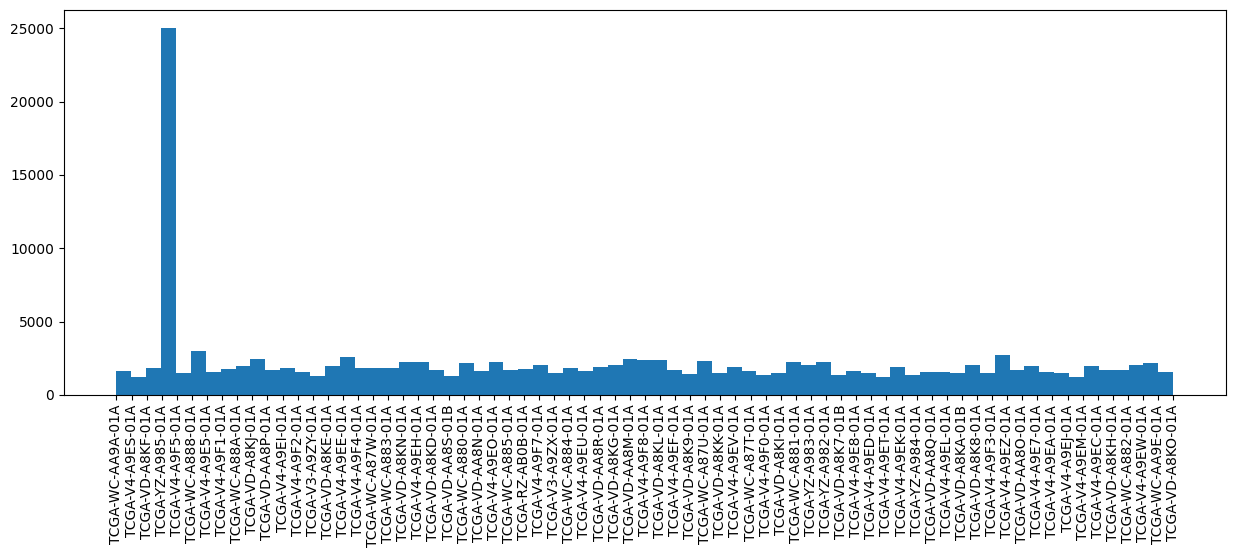

In [5]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(df_res.SAMPLE, bins=df_res.SAMPLE.unique().shape[0])
ax.tick_params(axis='x', labelrotation=90)
ids, cts = np.unique(df_res.SAMPLE, return_counts=True)
idx_max = np.argsort(cts)[-1]
print(ids[idx_max] + ': ' + str(cts[idx_max]) + ' number of mutations')
plt.show()

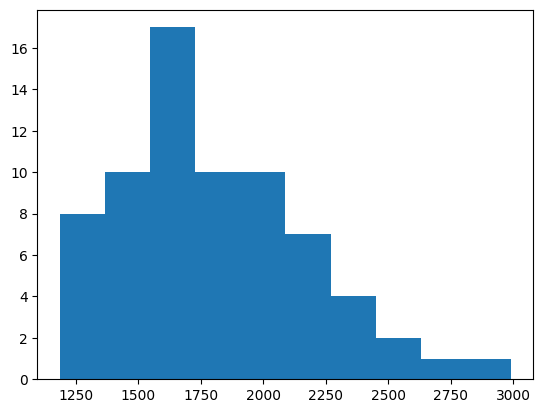

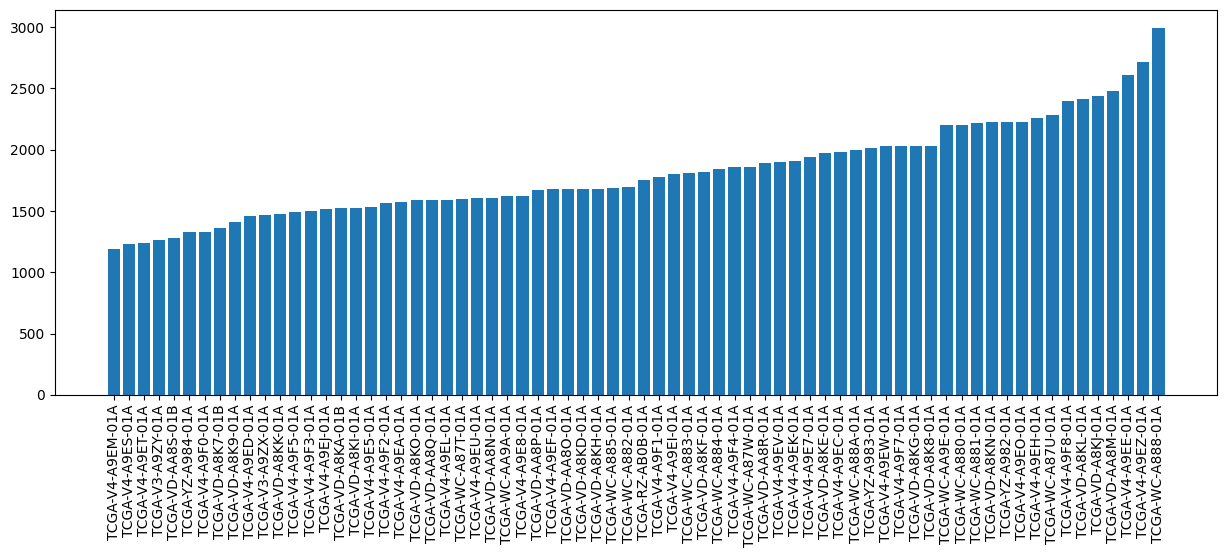

In [6]:
outliers = ['TCGA-YZ-A985-01A']
ids, cts = np.unique(df_res.loc[~df_res.SAMPLE.isin(outliers), 'SAMPLE'], return_counts=True)
plt.hist(cts)
plt.show()

fig, ax = plt.subplots(figsize=(15, 5))
ind_sorted = np.argsort(cts)
plt.bar(ids[ind_sorted], cts[ind_sorted])
ax.tick_params(axis='x', labelrotation=90)
plt.show()

In [7]:
df = pd.read_csv('genes.results.txt', sep='\t')

/Users/dlehotzk/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


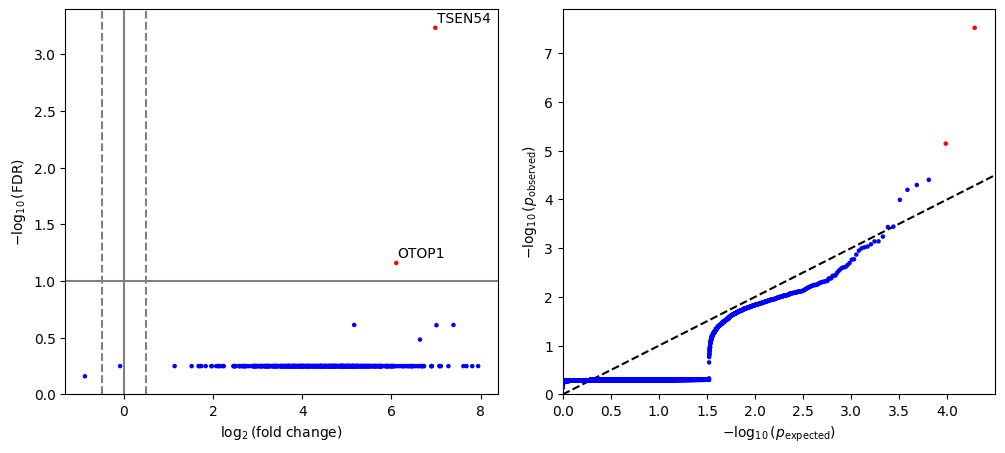

In [8]:
d = np.log2(df.OBS_SYN) - np.log2(df.EXP_SYN)
p = df.PVAL_SYN_BURDEN
l = df.GENE
plot_functions.plot_volcano(p, d, l)

/Users/dlehotzk/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


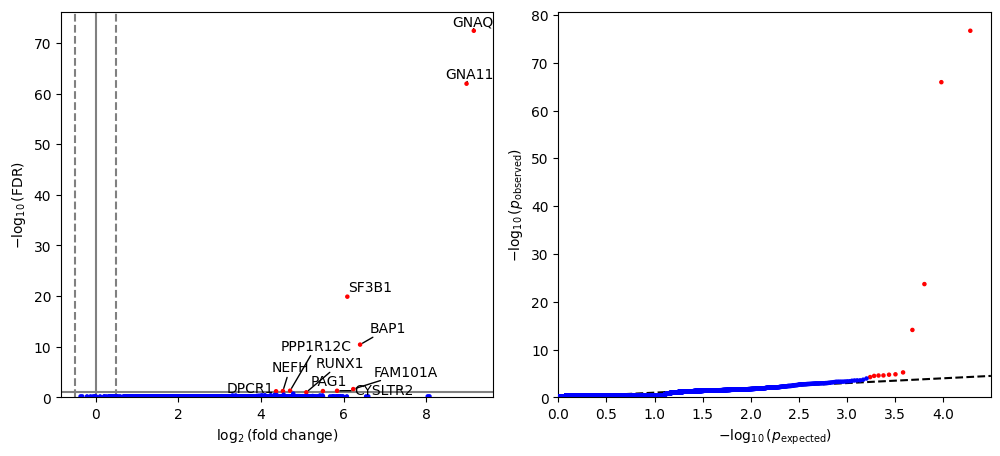

In [9]:
d = np.log2(df.OBS_NONSYN) - np.log2(df.EXP_NONSYN)
p = df.PVAL_NONSYN_BURDEN
l = df.GENE
plot_functions.plot_volcano(p, d, l)

/Users/dlehotzk/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


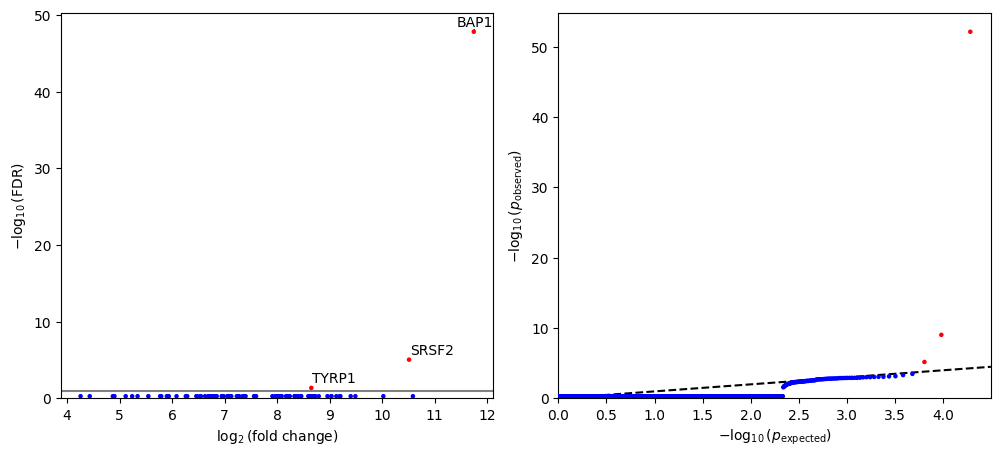

In [10]:
d = np.log2(df.OBS_INDEL) - np.log2(df.EXP_INDEL)
p = df.PVAL_INDEL_BURDEN
l = df.GENE
ind_keep = ~d.isna()
plot_functions.plot_volcano(p[ind_keep], d[ind_keep], l[ind_keep])

In [11]:
df.columns.tolist()

['GENE',
 'CHROM',
 'GENE_LENGTH',
 'R_SIZE',
 'R_OBS',
 'R_INDEL',
 'MU',
 'SIGMA',
 'ALPHA',
 'THETA',
 'MU_INDEL',
 'SIGMA_INDEL',
 'ALPHA_INDEL',
 'THETA_INDEL',
 'FLAG',
 'Pi_SYN',
 'Pi_MIS',
 'Pi_NONS',
 'Pi_SPL',
 'Pi_TRUNC',
 'Pi_NONSYN',
 'Pi_INDEL',
 'OBS_SYN',
 'OBS_MIS',
 'OBS_NONS',
 'OBS_SPL',
 'OBS_INDEL',
 'OBS_TRUNC',
 'OBS_NONSYN',
 'N_SAMP_SYN',
 'N_SAMP_MIS',
 'N_SAMP_NONS',
 'N_SAMP_SPL',
 'N_SAMP_TRUNC',
 'N_SAMP_NONSYN',
 'N_SAMP_INDEL',
 'EXP_SYN',
 'EXP_MIS',
 'EXP_NONS',
 'EXP_SPL',
 'EXP_TRUNC',
 'EXP_NONSYN',
 'PVAL_SYN_BURDEN',
 'PVAL_MIS_BURDEN',
 'PVAL_NONS_BURDEN',
 'PVAL_SPL_BURDEN',
 'PVAL_TRUNC_BURDEN',
 'PVAL_NONSYN_BURDEN',
 'PVAL_SYN_BURDEN_SAMPLE',
 'PVAL_MIS_BURDEN_SAMPLE',
 'PVAL_NONS_BURDEN_SAMPLE',
 'PVAL_SPL_BURDEN_SAMPLE',
 'PVAL_TRUNC_BURDEN_SAMPLE',
 'PVAL_NONSYN_BURDEN_SAMPLE',
 'EXP_INDEL',
 'PVAL_INDEL_BURDEN',
 'PVAL_MUT_BURDEN']

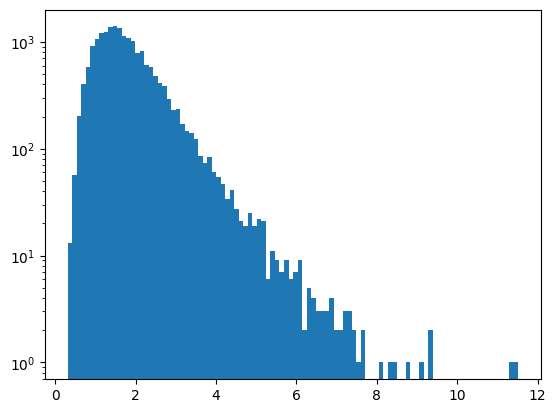

In [12]:
plt.hist(df.SIGMA, bins=100, log=True)
plt.show()

# Recomputing p-values from model parameters

In [13]:
def nb_pvalue_greater_midp(k, alpha, p):
    """ Calculate an UPPER TAIL p-value for a negative binomial distribution
        with a midp correction
    """
    return 0.5 * sp.stats.nbinom.pmf(k, alpha, p) + sp.special.betainc(k+1, alpha, 1-p)

def nb_pvalue_lower(k, alpha, p):
    return sp.special.betainc(k+1, alpha, 1-p)

def nb_pvalue_upper(k, alpha, p):
    ind_0 = k==0
    pvals = np.zeros_like(alpha)
    pvals[ind_0] = sp.stats.nbinom.pmf(k[ind_0], alpha[ind_0], p[ind_0])
    pvals[~ind_0] = sp.special.betainc(k[~ind_0], alpha[~ind_0], 1-p[~ind_0])
    return pvals

## Total burden

In [14]:
muts = ['SYN', 'MIS', 'NONS', 'TRUNC', 'SPL', 'NONSYN']
for mut in muts:
    df['PVAL_' + mut + '_BURDEN_recomp'] = nb_pvalue_greater_midp(
        df['OBS_' + mut],
        df.ALPHA,
        1 / (df.THETA * df['Pi_' + mut] + 1)
    )
    print(mut, np.min(df['PVAL_' + mut + '_BURDEN_recomp'] - df['PVAL_' + mut + '_BURDEN']), np.max(df['PVAL_' + mut + '_BURDEN_recomp'] - df['PVAL_' + mut + '_BURDEN']))

SYN -1.170175067954915e-13 7.416289804496046e-14
MIS -2.674527266322002e-13 1.6220358389773537e-13
NONS -3.863576125695545e-14 2.0761170560490427e-14
TRUNC -5.484501741648273e-14 2.6867397195928788e-14
SPL -5.3734794391857577e-14 9.2148511043888e-15
NONSYN -1.2922996006636822e-13 1.6575629757653587e-13


In [15]:
df['PVAL_INDEL_BURDEN_recomp'] = nb_pvalue_greater_midp(df.OBS_INDEL, df.ALPHA_INDEL, 1 / (df.THETA_INDEL*df.Pi_INDEL + 1))
print('INDEL', np.min(df['PVAL_INDEL_BURDEN_recomp'] - df['PVAL_INDEL_BURDEN']), np.max(df['PVAL_INDEL_BURDEN_recomp'] - df['PVAL_INDEL_BURDEN']))

INDEL -1.5765166949677223e-14 1.432187701766452e-14


## Sample-wise burden

In [16]:
for mut in muts:
    df['PVAL_' + mut + '_BURDEN_SAMPLE_recomp'] = nb_pvalue_greater_midp(
            df['N_SAMP_' + mut],
            df.ALPHA,
            1 / (df.THETA * df['Pi_' + mut] + 1)
        )
    print(mut, np.min(df['PVAL_' + mut + '_BURDEN_SAMPLE_recomp'] - df['PVAL_' + mut + '_BURDEN_SAMPLE']), np.max(df['PVAL_' + mut + '_BURDEN_SAMPLE_recomp'] - df['PVAL_' + mut + '_BURDEN_SAMPLE']))

SYN -1.170175067954915e-13 7.416289804496046e-14
MIS -2.674527266322002e-13 1.6220358389773537e-13
NONS -3.863576125695545e-14 2.0761170560490427e-14
TRUNC -5.484501741648273e-14 2.6867397195928788e-14
SPL -5.3734794391857577e-14 9.2148511043888e-15
NONSYN -1.2922996006636822e-13 1.6575629757653587e-13


# Computing lower and upper bounds for p-values

In [17]:
muts = ['SYN', 'MIS', 'NONS', 'TRUNC', 'SPL', 'NONSYN']
for mut in muts:
    # total burden
    df['PVAL_' + mut + '_BURDEN_lower'] = nb_pvalue_lower(
        df['OBS_' + mut],
        df.ALPHA,
        1 / (df.THETA * df['Pi_' + mut] + 1)
    )
    df['PVAL_' + mut + '_BURDEN_upper'] = nb_pvalue_upper(
        df['OBS_' + mut],
        df.ALPHA,
        1 / (df.THETA * df['Pi_' + mut] + 1)
    )
    # sample-wise burden
    df['PVAL_' + mut + '_BURDEN_SAMPLE_lower'] = nb_pvalue_lower(
            df['N_SAMP_' + mut],
            df.ALPHA,
            1 / (df.THETA * df['Pi_' + mut] + 1)
        )
    df['PVAL_' + mut + '_BURDEN_SAMPLE_upper'] = nb_pvalue_upper(
            df['N_SAMP_' + mut],
            df.ALPHA,
            1 / (df.THETA * df['Pi_' + mut] + 1)
        )

In [18]:
# total indel burden
df['PVAL_INDEL_BURDEN_lower'] = nb_pvalue_lower(
    df.OBS_INDEL, 
    df.ALPHA, 
    1 / (df.THETA_INDEL * df.Pi_INDEL + 1)
)
df['PVAL_INDEL_BURDEN_upper'] = nb_pvalue_upper(
    df.OBS_INDEL, 
    df.ALPHA, 
    1 / (df.THETA_INDEL * df.Pi_INDEL + 1)
)

/var/folders/7d/ccyblkpj6wvbl5n45y_l75180000gq/T/ipykernel_96440/1963238739.py:1: RuntimeWarning: divide by zero encountered in log2
  d = np.log2(df.OBS_NONSYN.to_numpy()) - np.log2(df.EXP_NONSYN.to_numpy())


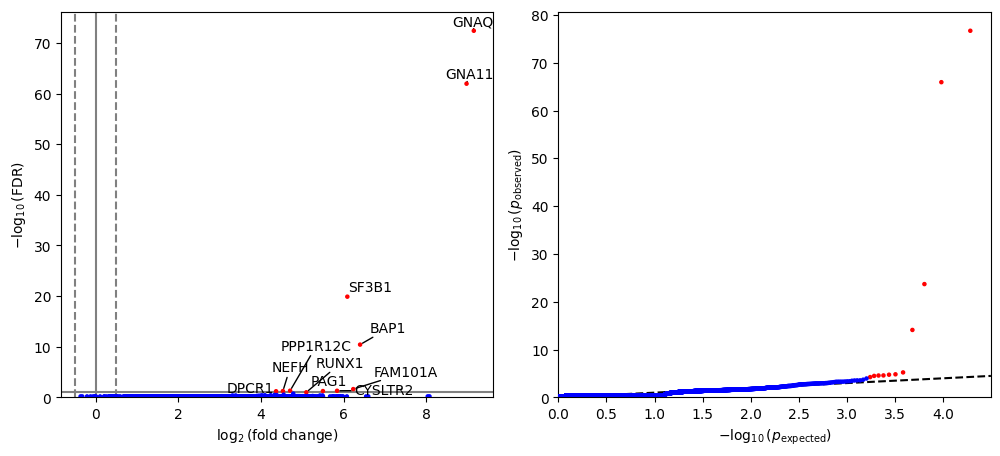

In [19]:
d = np.log2(df.OBS_NONSYN.to_numpy()) - np.log2(df.EXP_NONSYN.to_numpy())
p = df.PVAL_NONSYN_BURDEN_recomp.to_numpy()
l = df.GENE.to_numpy()
plot_functions.plot_volcano(p, d, l)

In [20]:
p_bounds = df[['PVAL_NONSYN_BURDEN_lower', 'PVAL_NONSYN_BURDEN_upper']].to_numpy()

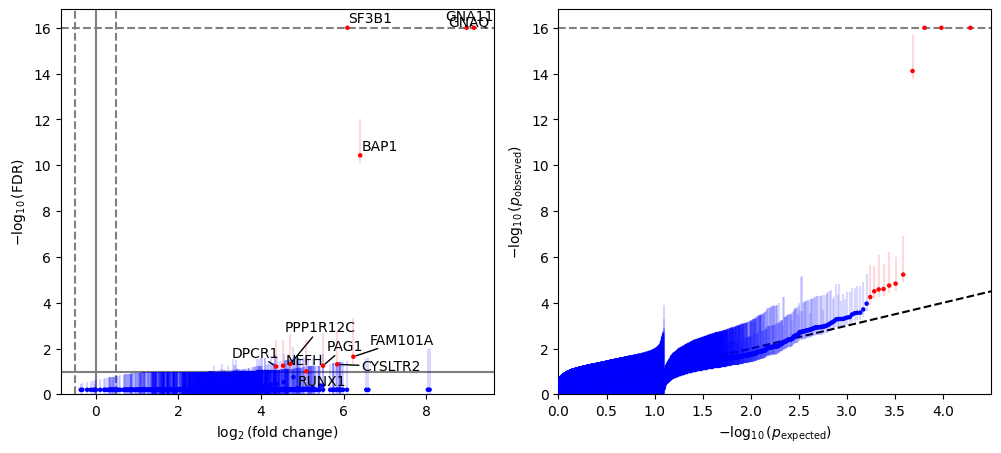

In [21]:
importlib.reload(plot_functions)
plot_functions.plot_volcano(p, d, l, pval_bounds=p_bounds, ymax_vol=16, ymax_qq=16)

In [22]:
df_prom = pd.read_csv('promoters.results.txt', sep='\t')
df_prom.columns.tolist()

['ELT',
 'ELT_SIZE',
 'FLAG',
 'R_SIZE',
 'R_OBS',
 'R_INDEL',
 'MU',
 'SIGMA',
 'ALPHA',
 'THETA',
 'MU_INDEL',
 'SIGMA_INDEL',
 'ALPHA_INDEL',
 'THETA_INDEL',
 'Pi_SUM',
 'Pi_INDEL',
 'OBS_SAMPLES',
 'OBS_SNV',
 'OBS_INDEL',
 'EXP_SNV',
 'PVAL_SNV_BURDEN',
 'PVAL_SAMPLE_BURDEN',
 'EXP_INDEL',
 'PVAL_INDEL_BURDEN',
 'PVAL_MUT_BURDEN']

In [23]:
pfxs_obs = ['SNV', 'INDEL', 'SAMPLES']
pfxs_pval = ['SNV', 'INDEL', 'SAMPLE']
pfxs_pi = ['SUM', 'INDEL', 'SUM']
pfxs_at = ['', '_INDEL', '']

for i in range(len(pfxs_obs)):
    df_prom['PVAL_' + pfxs_pval[i] + '_BURDEN_recomp'] = nb_pvalue_greater_midp(
            df_prom['OBS_' + pfxs_obs[i]],
            df_prom['ALPHA' + pfxs_at[i]],
            1 / (df_prom['THETA' + pfxs_at[i]] * df_prom['Pi_' + pfxs_pi[i]] + 1)
        )    
    df_prom['PVAL_SNV_BURDEN_lower'] = nb_pvalue_lower(
        df_prom['OBS_' + pfxs_obs[i]],
        df_prom['ALPHA' + pfxs_at[i]],
        1 / (df_prom['THETA' + pfxs_at[i]] * df_prom['Pi_' + pfxs_pi[i]] + 1)
    )
    df_prom['PVAL_SNV_BURDEN_upper'] = nb_pvalue_upper(
        df_prom['OBS_' + pfxs_obs[i]],
        df_prom['ALPHA' + pfxs_at[i]],
        1 / (df_prom['THETA' + pfxs_at[i]] * df_prom['Pi_' + pfxs_pi[i]] + 1)
    )
    print(pfxs_obs[i], np.min(df_prom['PVAL_' + pfxs_pval[i] + '_BURDEN_recomp'] - df_prom['PVAL_' + pfxs_pval[i] + '_BURDEN']), np.max(df_prom['PVAL_' + pfxs_pval[i] + '_BURDEN_recomp'] - df_prom['PVAL_' + pfxs_pval[i] + '_BURDEN']))

SNV -2.4480417692984702e-14 3.197442310920451e-14
INDEL -1.1435297153639112e-14 2.383510055992133e-15
SAMPLES -2.4480417692984702e-14 3.197442310920451e-14
